# Compare with manual ground truth labels

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import napari
import glob
import os
import re
from patchify import patchify, unpatchify
from skimage import io
import pandas as pd

## read images from tiles and get points

In [7]:
def img_from_tiles_sub(folder): #modify this to MGFeatures

    patchsize = (8192, 8192)
    
    file = r'\*_export_s{}_*'.format(str(1).zfill(2))
    
    R = 0
    C = 0
    minR = 0
    minC = 0
    
    imgfile_list = []
    
    for i,imgfile in enumerate(glob.glob(folder + file)): #os.getcwd() +
        imgfile_list.append(imgfile)
        ind = re.findall('\d+', imgfile[-15:])
        r, c = int(ind[1]), int(ind[2])
        
        if i==0:
            minR = r
            minC = c
        
        if r < minR:
            minR = r
        if c < minC:
            minC = c
                
        if r > R:
            R = r
        if c > C:
            C = c
        
    imageshape = (R-minR+1, C-minC+1, *patchsize)
    imagepatches = np.zeros(shape=imageshape, dtype=np.uint8)
    
    for imgfile in imgfile_list:
        ind = re.findall('\d+', imgfile[-15:])
        r, c = int(ind[1]), int(ind[2])

        imagepatches[r - minR, c - minC, :, :] = io.imread(imgfile).astype(np.uint8)

    image = unpatchify(imagepatches, (patchsize[0] * imageshape[0], patchsize[1] * imageshape[1]))
    image = image.astype(np.uint8)

    return image, (minR, minC)

In [8]:
os.getcwd()

'C:\\Users\\hanyi\\Documents\\MGFeatures'

In [17]:
folder_lyso = r'C:\Users\hanyi\Documents/MG_martina1/activated-lyso'
folder_nolyso = r'C:\Users\hanyi\Documents/MG_martina1/activated-nolyso'
folder_foamy = r'C:\Users\hanyi\Documents/MG_martina1/foamy'
folder_interferon = r'C:\Users\hanyi\Documents/MG_martina1/interferon'
folder_normal = r'C:\Users\hanyi\Documents/MG_martina1/normal'
folder_tcell = r'C:\Users\hanyi\Documents/MG_martina1/tcell'

In [18]:
%%time
lyso = img_from_tiles_sub(folder_lyso)
nolyso = img_from_tiles_sub(folder_nolyso)
foamy = img_from_tiles_sub(folder_foamy)
interferon = img_from_tiles_sub(folder_interferon)
normal = img_from_tiles_sub(folder_normal)
tcell = img_from_tiles_sub(folder_tcell)

CPU times: total: 13 s
Wall time: 13.4 s


add to viewer to get points cooridnates

In [ ]:
v = napari.Viewer()

In [26]:
for img in ([lyso[0], nolyso[0], foamy[0], interferon[0], normal[0], tcell[0]]):
    v.add_image(img, contrast_limits=(0,1))
    #rename on gui

C:\Users\hanyi\anaconda3\envs\MG\lib\site-packages\napari\_vispy\layers\image.py:231: UserWarning: data shape (40960, 24576) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
C:\Users\hanyi\anaconda3\envs\MG\lib\site-packages\napari\_vispy\layers\image.py:231: UserWarning: data shape (40960, 24576) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
C:\Users\hanyi\anaconda3\envs\MG\lib\site-packages\napari\_vispy\layers\image.py:231: UserWarning: data shape (40960, 24576) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
C:\Users\hanyi\anaconda3\envs\MG\lib\site-packages\napari\_vispy\layers\image.py:231: UserWarning: data shape (40960, 24576) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently i

saved points csv

## make df

In [4]:
# or lyso_pts = v.layers['lyso_pts'].data
lyso_pts = pd.read_csv(r'C:\Users\hanyi\Documents\manualdata excel\points_lyso.csv', index_col='index')
nolyso_pts = pd.read_csv(r'C:\Users\hanyi\Documents\manualdata excel\points_nolyso.csv', index_col='index')
foamy_pts = pd.read_csv(r'C:\Users\hanyi\Documents\manualdata excel\points_foamy.csv', index_col='index')
interferon_pts = pd.read_csv(r'C:\Users\hanyi\Documents\manualdata excel\points_interferon.csv', index_col='index')
normal_pts = pd.read_csv(r'C:\Users\hanyi\Documents\manualdata excel\points_normal.csv', index_col='index')
tcell_pts = pd.read_csv(r'C:\Users\hanyi\Documents\manualdata excel\points_tcell.csv', index_col='index')

In [19]:
def translate_pts_df(df, minRC):
    minR, minC = minRC
    addR, addC = (minR-1)*8192, (minC-1)*8192
    
    df['axis-0'] = df['axis-0'].apply(lambda x: x+addR)
    df['axis-1'] = df['axis-1'].apply(lambda x: x+addC)
    
    return df #why without return will not update df??

In [20]:
namelist = [lyso, nolyso, foamy, interferon, normal, tcell]
RCs = [res[1] for res in namelist] 

In [26]:
RCs

[(4, 6), (4, 6), (5, 7), (4, 7), (5, 7), (5, 7)]

In [21]:
dflist = [lyso_pts, nolyso_pts, foamy_pts, interferon_pts, normal_pts, tcell_pts]

In [22]:
dflistT = []
for df, minRC in zip(dflist, RCs):
    dflistT.append(translate_pts_df(df, minRC))

#this dosent change the dataframe, needs to append new

In [27]:
dflistT[0].to_excel(r'C:\Users\hanyi\Documents\manualdata excel\points_lyso_tf.xlsx')

### view

In [88]:
from MGFeatures import remake_bbox, make_bbox_stack

In [93]:
featuresall = pd.read_excel('featuresall_v06.xlsx', index_col=0)

In [94]:
featuresall

,Unnamed: 0.1,Unnamed: 0,cell_area,organelles_area,nucleus_area,heterochromatin_area,lipids_area,mitochondria_area,lysosomal_area,empty_area,...,mito_cyto_R,mito_organelles_R,ERlen_cyto_R,hetchr_nucleus_R,Component1,Component2,Component3,Component4,Component5,pca_kmeans_labels
0,0,0,80980,28480,39316,17268,3376,604,5896,13184,...,0.014497,0.021208,0.037841,0.439210,-0.994561,0.961159,-0.789905,1.704630,-0.497049,2
1,1,1,68545,16588,41028,16854,0,965,0,10929,...,0.035069,0.058175,0.029500,0.410793,0.172004,0.773712,0.222729,-0.563833,0.488448,5
2,2,2,87034,33185,44767,16235,0,5547,0,9082,...,0.131237,0.167154,0.040262,0.362656,0.433065,-1.410054,-0.191482,-1.468007,-0.627576,5
3,3,3,74590,26943,17393,9114,0,4486,0,30254,...,0.078431,0.166500,0.017867,0.524004,2.096643,-2.664874,2.487589,3.342696,3.665895,1
4,4,4,130431,63809,50680,20881,0,5370,4077,15942,...,0.067335,0.084157,0.060642,0.412017,-0.632810,-0.662052,-1.027281,0.023043,0.025753,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,929,929,162785,73839,59104,26995,8567,9625,0,29842,...,0.092833,0.130351,0.038414,0.456737,0.207488,-1.244334,0.505897,0.022741,0.305257,1
930,930,930,104354,46189,49812,19212,0,4640,0,8353,...,0.085072,0.100457,0.054762,0.385690,-0.456921,-0.754774,-0.691638,-1.220351,-0.152474,5
931,931,931,257260,171828,76624,31989,109336,4108,0,8808,...,0.022742,0.023908,0.001437,0.417480,-2.662583,0.637676,2.489149,-0.616940,-1.207266,3
932,932,932,48279,23758,12364,5365,0,4578,0,12157,...,0.127468,0.192693,0.026847,0.433921,1.312272,-2.671567,1.257623,0.872083,1.321337,1


In [95]:
cmap = {0:'cyan',
       1:'#aaaaff', #purple
       2:'red', 
       3:'yellow', 
       4:'magenta',
       5:'orange'}

bbox_slice = [remake_bbox(bbox, stack=False) for bbox in featuresall['bbox_rects']]
pca_kmeans_labels = featuresall['pca_kmeans_labels'].values.tolist()
clabels = [cmap.get(k) for k in featuresall['pca_kmeans_labels']]

In [97]:
text_params = {'string':'{index}',
              'size': 5,
              'color': 'gray',
              'anchor':'upper_left',
              'translation':[0,0]
              }

In [98]:
v.add_shapes(data = bbox_slice,
            features={'index': featuresall['Unnamed: 0'].values},
            text=text_params,
            face_color=clabels)

<Shapes layer 'bbox_slice' at 0x2b40a6e96c0>

In [543]:
for i in range(6):
    bbox_colour = [remake_bbox(bbox, stack=False) for bbox in featuresall[featuresall['pca_kmeans_labels']==i]['bbox_rects']]
    v.add_shapes(data=bbox_colour, 
                 features={'index': featuresall[featuresall['pca_kmeans_labels']==i]['Unnamed: 0'].values},
                 text= text_params,
                face_color=cmap[i])

C:\Users\hanyi\anaconda3\envs\MG\lib\site-packages\napari\_vispy\layers\image.py:231: UserWarning: data shape (32768, 16384) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
C:\Users\hanyi\anaconda3\envs\MG\lib\site-packages\napari\_vispy\layers\image.py:231: UserWarning: data shape (40960, 24576) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
C:\Users\hanyi\anaconda3\envs\MG\lib\site-packages\napari\_vispy\layers\image.py:231: UserWarning: data shape (40960, 24576) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
C:\Users\hanyi\anaconda3\envs\MG\lib\site-packages\napari\_vispy\layers\image.py:231: UserWarning: data shape (40960, 24576) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently i

## calculating distances

In [114]:
bbox2pt = lambda minr, minc, maxr, maxc: [(minr+maxr)/2, (minc+maxc)/2]

In [115]:
bbox_slice_pt = np.array([bbox2pt(bbox[0][0], bbox[0][1], bbox[2][0], bbox[2][1]) for bbox in bbox_slice])

In [116]:
pts = pd.DataFrame(bbox_slice_pt, columns=['unbiased_row', 'unbiased_col'])

In [117]:
eucl = lambda xr, xc, mpts: np.sqrt((mpts[0]-xr)**2+(mpts[1]-xc)**2)


algo\
1 calc eucl for each manual - result in df with n cols; n = number of manual labels\
    loop and append\
2 filter min, na\
3 reverse one hot encoding to 1 column\
4 visualise in napari with text aid

### 1. calc euclidean distance between all manual and unbiased points

In [128]:
mptslist = []
for d in dflistT:
    mpts = pd.concat([pts.apply(lambda x: eucl(x['unbiased_row'], x['unbiased_col'],
                                          d.loc[i]), axis=1) for i in range(len(d))
                     ],
                    ignore_index=True,
                    axis=1
                    )
    mptslist.append(mpts)

In [123]:
#[lyso_mpts, nolyso_mpts, foamy_mpts, interferon_mpts, normal_mpts, tcell_mpts] = mptslist

In [129]:
for mpts,d in zip(mptslist, dflistT):
    mpts.columns = [str([int(d.iloc[i, 0]),int(d.iloc[i, 1])]) for i in range(len(d))]

In [130]:
mptslist[0]

,"[29722, 51333]","[30966, 51587]","[33717, 52305]","[35740, 54151]","[35362, 54086]","[35935, 54540]","[37415, 54291]","[37307, 54885]","[37253, 56268]","[39432, 56307]",...,"[58506, 51772]","[58390, 57886]","[57072, 57792]","[55260, 58525]","[55234, 59564]","[58217, 61561]","[58084, 62107]","[57604, 62041]","[52506, 62786]","[47428, 57890]"
0,25100.793192,25887.257193,27885.046271,30533.003767,30271.479092,30964.653035,31602.180720,32023.031802,33133.508338,34421.706290,...,45855.504537,49123.565725,48013.012397,47046.274479,47691.366871,51259.862493,51510.226571,51102.819612,47884.152241,40832.803105
1,16397.601168,17393.102835,19814.081741,22551.524322,22234.851171,22961.536481,23880.482548,24196.759821,25113.298753,26727.753035,...,41221.146865,43466.668720,42247.561605,40995.867975,41489.227614,45073.696925,45241.290034,44797.788968,40982.169008,34004.536062
2,35642.969363,36244.791833,37838.189223,40310.612556,40104.504935,40744.581605,41121.046648,41614.897402,42854.297486,43813.252374,...,51860.785009,56059.215154,55095.461691,54448.979947,55227.410150,58677.980495,59007.219356,58647.742228,56121.419358,49205.894834
3,22944.459805,23725.756176,25723.785017,28374.569639,28111.793634,28805.968628,29451.848035,29869.600724,30975.459030,32274.662083,...,43993.109764,47149.916172,46026.434201,45029.936637,45661.492088,49235.692257,49478.510962,49067.316967,45795.173979,38741.932573
4,19459.046778,20293.831362,22411.412120,25099.942580,24820.766995,25527.300926,26255.380891,26645.175059,27700.858438,29098.067110,...,41845.136684,44662.747205,43500.371367,42407.109817,42990.417110,46577.692827,46793.870057,46370.053433,42898.954958,35850.805352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,44938.838204,43682.807150,40902.996682,38854.417256,39231.978037,38665.419318,37181.641287,37302.151871,37421.699965,35249.518600,...,16215.162659,16709.213398,17969.649620,19900.649993,20197.849594,18120.515870,18479.766625,18880.153287,23843.609061,27470.833303
930,44860.674382,43619.801316,40887.921769,38978.046491,39349.480894,38819.042981,37322.387983,37488.819458,37715.203125,35564.958079,...,16099.722027,17642.204883,18824.964910,20778.561863,21207.193005,19542.556673,19956.268905,20317.710630,25081.895637,28043.663874
931,45106.963842,43861.207810,41114.257537,39163.278662,39536.705549,38995.462438,37501.639440,37654.798478,37850.013744,35691.883531,...,16321.954277,17558.124277,18767.706352,20718.739850,21107.793556,19310.406764,19707.506571,20082.098494,24916.968580,28087.286551
932,45449.607384,44193.963284,41415.370094,39370.017834,39747.474651,39181.591348,37697.486335,37818.837562,37939.841552,35767.809682,...,16718.514805,17224.483720,18486.191501,20416.336978,20710.033951,18614.257741,18969.630311,19372.416069,24345.338629,27989.701318


### 2. filter min, na and 3. reverse ohe

In [173]:
mptsfilters = []
for mpts in mptslist:
    filtered = mpts[mpts == mpts.min()].idxmax(1)
    mptsfilters.append(filtered)

In [180]:
mptsfilters = pd.concat([m for m in mptsfilters], axis=1)

In [183]:
mptsfilters = mptsfilters.fillna(0)

In [191]:
mptsfilters.columns = ['2/red/lyso', '5/orange/nolyso', '3/yellow/foamy', '0/blue/interferon', '1/purple/normal', '4/pink/tcell']

In [193]:
def remake_point(pt_asstring):
    numbers = ''.join([i if i!='[' and i!=']' and i!='\n ' and i!=',' else '' for i in pt_asstring])
    pt = [int(i) for i in numbers.split(' ') if i!=''] #napari Points does not take array
    return pt

In [194]:
for c in mptsfilters.columns:
    mptsfilters[f'{c}'] = [remake_point(mptsfilters[f'{c}'][i])
                           if mptsfilters[f'{c}'][i]!=0 
                           else [0,0] 
                           for i in range(mptsfilters.shape[0])]

In [195]:
mptsfilters

,2/red/lyso,5/orange/nolyso,3/yellow/foamy,0/blue/interferon,1/purple/normal,4/pink/tcell
0,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
1,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
2,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
3,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
4,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
...,...,...,...,...,...,...
929,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
930,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
931,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
932,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"


In [196]:
map_manual = pd.concat([pts, featuresall['pca_kmeans_labels'], mptsfilters], axis=1)

In [197]:
map_manual = map_manual.reset_index()

In [198]:
map_manual

,index,unbiased_row,unbiased_col,pca_kmeans_labels,2/red/lyso,5/orange/nolyso,3/yellow/foamy,0/blue/interferon,1/purple/normal,4/pink/tcell
0,0,18881.0,28695.0,2,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
1,1,19467.0,38539.0,5,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
2,2,19989.0,17045.5,5,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
3,3,19959.5,30570.0,1,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
4,4,20540.0,34177.5,5,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
...,...,...,...,...,...,...,...,...,...,...
929,929,74593.5,53804.5,1,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
930,930,74581.0,50878.0,5,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
931,931,74828.0,51714.0,3,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
932,932,75108.5,53740.0,1,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"


### 4. visualise spatially

In [200]:
text_params_pts = {'string':'{index}',
                  'size': 5,
                  'color': 'gray',
                  'anchor':'upper_left',
                  'translation':[0,0]
                  }

In [203]:
mptscols = map_manual.columns[4:]
mptscols

Index(['2/red/lyso', '5/orange/nolyso', '3/yellow/foamy', '0/blue/interferon',
       '1/purple/normal', '4/pink/tcell'],
      dtype='object')

In [206]:
for c, rgb in zip(mptscols, ['red', 'orange', 'yellow', 'cyan', '#aaaaff', 'magenta']):
    v.add_points(data=map_manual.to_dict('list')[f'{c}'],
                 features={'index': map_manual['index'].values},
                 text=text_params_pts,
                 face_color=f'{rgb}',
                 size=500
                )

In [207]:
map_manual.to_excel('map_manual.xlsx', index=False)

In [280]:
map_df = pd.read_excel('map_manual_checked.xlsx', index_col=0)

In [281]:
map_df = map_df.drop(['unbiased_row', 'unbiased_col'], axis=1)

In [282]:
col_list = list(map_df)

In [283]:
col_relist = col_list[0], col_list[4], col_list[5], col_list[1], col_list[3], col_list[-1], col_list[2]

In [284]:
map_df = map_df.reindex(columns = col_relist)

In [285]:
map_df.reset_index(inplace=True)

In [286]:
map_df

,index,pca_kmeans_labels,0/blue/interferon,1/purple/normal,2/red/lyso,3/yellow/foamy,4/pink/tcell,5/orange/nolyso
0,0,2,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
1,1,5,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
2,2,5,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
3,3,1,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
4,4,5,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
...,...,...,...,...,...,...,...,...
929,929,1,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
930,930,5,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
931,931,3,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
932,932,1,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"


In [287]:
map_df = map_df.where(map_df!='[0, 0]', np.nan)

In [370]:
manual_df = map_df.drop(['pca_kmeans_labels', 'index'], axis=1)

In [371]:
manual_df.columns=[0,1,2,3,4,5]

In [372]:
manual_df.dropna(how='all', inplace=True)

In [373]:
manual_df

,0,1,2,3,4,5
95,NaN,NaN,"[29722, 51333]",NaN,NaN,"[30686, 50154]"
109,"[38077, 56258]",NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,"[42911, 58733]"
111,NaN,NaN,NaN,NaN,NaN,"[43819, 50928]"
112,"[43899, 51540]",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
909,NaN,NaN,"[50696, 52107]",NaN,NaN,NaN
910,NaN,NaN,NaN,"[51901, 59227]",NaN,NaN
916,NaN,NaN,"[55260, 58525]",NaN,NaN,NaN
918,NaN,NaN,NaN,"[56419, 54354]",NaN,NaN


In [374]:
for c in range(6):
    manual_df[c] = [np.nan_to_num(i, nan=-1) for i in manual_df[c]]
    manual_df[c] = [c if i!=-1.0 else -1 for i in manual_df[c]] # conv to -1, bcos cannot work with np.nan

In [375]:
manual_df

,0,1,2,3,4,5
95,-1,-1,2,-1,-1,5
109,0,-1,-1,-1,-1,-1
110,-1,-1,-1,-1,-1,5
111,-1,-1,-1,-1,-1,5
112,0,-1,-1,-1,-1,-1
...,...,...,...,...,...,...
909,-1,-1,2,-1,-1,-1
910,-1,-1,-1,3,-1,-1
916,-1,-1,2,-1,-1,-1
918,-1,-1,-1,3,-1,-1


In [421]:
manual_col = manual_df.max(axis=1)

In [422]:
manual_col = pd.DataFrame(manual_col, columns=['manual_col'])

In [423]:
manual_col

,manual_col
95,5
109,0
110,5
111,5
112,0
...,...
909,2
910,3
916,2
918,3


In [427]:
map_res = map_df[['index','pca_kmeans_labels']].join(manual_col.reset_index().set_index('index'), on='index')

In [431]:
map_res_sort = map_res.sort_values(by=['pca_kmeans_labels'])

In [434]:
map_res_sort_filter = map_res_sort.dropna()

In [503]:
map_res_sort_filter.to_excel('manual_kmeans_1to1.xlsx', index=False)

In [436]:
import matplotlib.pyplot as plt

(array([[12.,  0., 21.,  0., 22.,  0., 18.,  0., 10., 61.],
        [ 5.,  0., 10.,  0., 42.,  0., 24.,  0.,  3., 60.]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 2 BarContainer objects>)

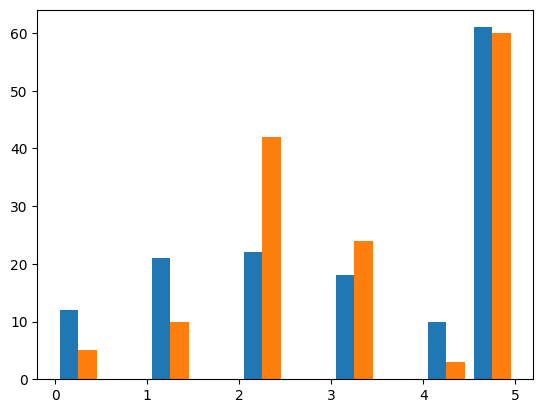

In [551]:
plt.hist(map_res_sort_filter[['pca_kmeans_labels','manual_col']]) #

In [465]:
from sklearn.metrics import confusion_matrix, make_confusion_matrix

ImportError: cannot import name 'make_confusion_matrix' from 'sklearn.metrics' (C:\Users\hanyi\anaconda3\envs\MG\lib\site-packages\sklearn\metrics\__init__.py)

In [458]:
import seaborn as sns

In [505]:
cf_abs = confusion_matrix(map_res_sort_filter['manual_col'], map_res_sort_filter['pca_kmeans_labels'])

In [506]:
cf_abs

array([[ 4,  0,  0,  0,  1,  0],
       [ 2,  1,  0,  0,  2,  5],
       [ 2,  3, 16,  2,  2, 17],
       [ 1,  2,  2, 16,  0,  3],
       [ 0,  0,  0,  0,  2,  1],
       [ 3, 15,  4,  0,  3, 35]], dtype=int64)

In [496]:
cfnums=[]
for r in cf_abs:
    total = sum(r)
    for c in r:
        c/=total
        cfnums.append(c)
cf = np.array(cfnums).reshape((6,6))

In [528]:
cfnums=[]
for r in cf_abs.T:
    total = sum(r)
    for c in r:
        c/=total
        cfnums.append(c)
cf2 = np.array(cfnums).reshape((6,6)).T

In [498]:
for i in range(6):
    for j in range(6):
        cf[i, j] = round(cf[i, j],2)

In [499]:
cf

array([[0.8 , 0.  , 0.  , 0.  , 0.2 , 0.  ],
       [0.2 , 0.1 , 0.  , 0.  , 0.2 , 0.5 ],
       [0.05, 0.07, 0.38, 0.05, 0.05, 0.4 ],
       [0.04, 0.08, 0.08, 0.67, 0.  , 0.12],
       [0.  , 0.  , 0.  , 0.  , 0.67, 0.33],
       [0.05, 0.25, 0.07, 0.  , 0.05, 0.58]])

In [529]:
for i in range(6):
    for j in range(6):
        cf2[i, j] = round(cf2[i, j],2)
cf2

array([[0.33, 0.  , 0.  , 0.  , 0.1 , 0.  ],
       [0.17, 0.05, 0.  , 0.  , 0.2 , 0.08],
       [0.17, 0.14, 0.73, 0.11, 0.2 , 0.28],
       [0.08, 0.1 , 0.09, 0.89, 0.  , 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.2 , 0.02],
       [0.25, 0.71, 0.18, 0.  , 0.3 , 0.57]])

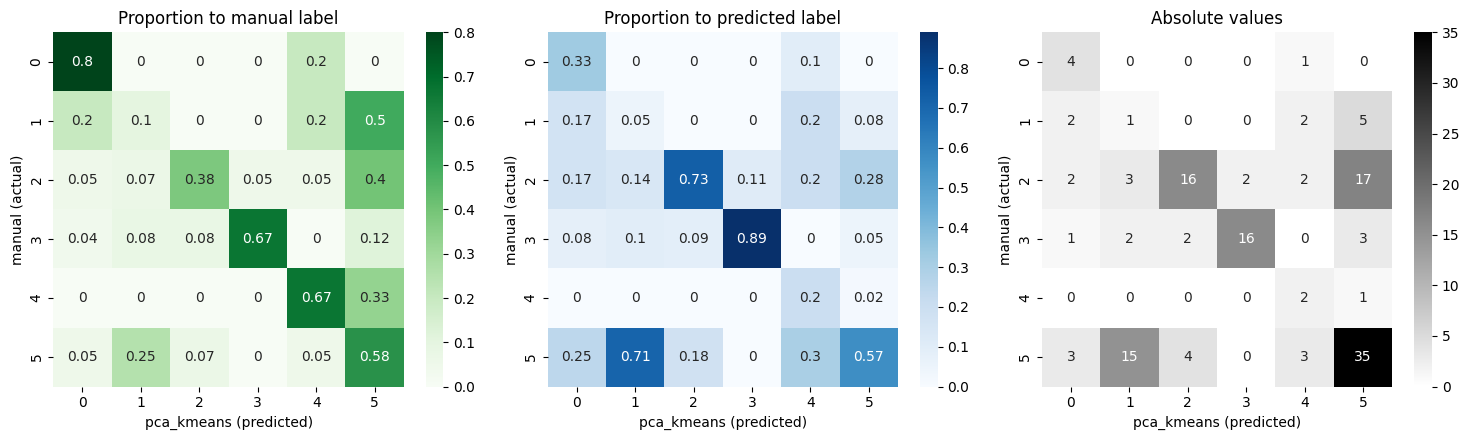

In [534]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4.5))
ax1 = sns.heatmap(cf, cmap='Greens', annot=True, ax=ax1)
ax2 = sns.heatmap(cf2, cmap='Blues', annot=True, ax=ax2)
ax3 = sns.heatmap(cf_abs, cmap='binary', annot=True, ax=ax3)

ax1.set_xlabel('pca_kmeans (predicted)')
ax1.set_ylabel('manual (actual)')
ax1.set_title('Proportion to manual label') #false negatives

ax2.set_xlabel('pca_kmeans (predicted)')
ax2.set_ylabel('manual (actual)')
ax2.set_title('Proportion to predicted label') #false positives

ax3.set_xlabel('pca_kmeans (predicted)')
ax3.set_ylabel('manual (actual)')
ax3.set_title('Absolute values')

plt.tight_layout()
plt.show()

# plt.xlabel()
# plt.ylabel()
# plt.title()

In [ ]:
plt.savefig('confusion_matrix.png')

<Figure size 640x480 with 0 Axes>